# Submitted By: Sandeep

In [ ]:
import pandas as pd

In [ ]:
! ls

Online_Retail.xlsx  sample_data


In [ ]:
df= pd.read_excel('Online_Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
df.InvoiceNo.unique

<bound method Series.unique of 0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 541909, dtype: object>

In [ ]:
len(df)

541909

In [ ]:
df.drop_duplicates(keep='first',inplace=True)
len(df)

536641

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [ ]:
df = df[df['Quantity']>0]
len(df)

526054

In [ ]:
df.InvoiceNo = df.InvoiceNo.astype(str)
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
#number of canceled transactions
count =0
for i in df.InvoiceNo:
  if i[0] == 'C' or str(i)[0] == 'c':
    count += 1
print(count)

0


In [ ]:
df = df[~df.InvoiceNo.str.contains("C")]
# the number is 0 because we have already remove  quantity with 0 value.
len(df)

526054

In [ ]:
df[df.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
df = df.dropna()
len(df)

392732

In [ ]:
df.CustomerID = df.CustomerID.astype(str)

In [ ]:
df.describe()

,Quantity,UnitPrice
count,392732.000000,392732.000000
mean,13.153718,3.125596
std,181.588420,22.240725
min,1.000000,0.000000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [ ]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [ ]:
df.InvoiceDate.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  392732
unique                  17286
top       2011-11-14 15:27:00
freq                      542
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [ ]:
df1 = df[df['InvoiceDate']>= "2010-12-09"] # one year data
len(df1)
tx_data = df

In [ ]:
tx_uk = df[df['Country']=='United Kingdom'].reset_index(drop=True)

In [ ]:
tx_uk['InvoiceYearMonth'] = tx_uk['InvoiceDate'].map(lambda date: 100*date.year + date.month)

In [ ]:
tx_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012


*Segmentation technique*
**RFM**

Recency

In [ ]:
tx_user = pd.DataFrame(tx_data['CustomerID'].unique())
tx_user.columns = ['CustomerID']

In [ ]:
tx_max_purchase = tx_uk.groupby('CustomerID').InvoiceDate.max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

In [ ]:
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days
tx_max_purchase.head()

,CustomerID,MaxPurchaseDate,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2


In [ ]:
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')
tx_user.head()

,CustomerID,Recency
0,17850.0,371
1,13047.0,31
2,13748.0,95
3,15100.0,333
4,15291.0,25


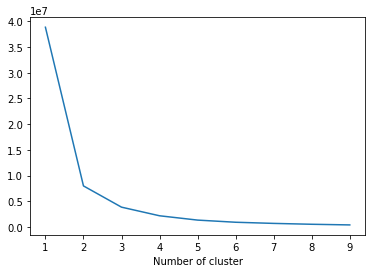

In [ ]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse={} # error
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_  #cluster names corresponding to recency values 
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
#going with 3 clusters
kmeans = KMeans(n_clusters=3)
tx_user['RecencyCluster'] = kmeans.fit_predict(tx_user[['Recency']])


In [ ]:
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,2638.0,31.322214,25.272426,0.0,10.0,24.0,50.0,92.0
1,558.0,292.654122,45.303609,224.0,254.0,283.0,325.0,373.0
2,725.0,153.960000,37.985019,93.0,120.0,154.0,185.0,222.0


In [ ]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

In [ ]:
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,558.0,292.654122,45.303609,224.0,254.0,283.0,325.0,373.0
1,725.0,153.960000,37.985019,93.0,120.0,154.0,185.0,222.0
2,2638.0,31.322214,25.272426,0.0,10.0,24.0,50.0,92.0


**Frequency**

In [ ]:
tx_frequency = tx_uk.groupby('CustomerID').InvoiceDate.count().reset_index()

In [ ]:
tx_frequency.columns = ['CustomerID','Frequency']

In [ ]:
tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID')
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency
0,17850.0,371,0,297
1,15100.0,333,0,3
2,18074.0,373,0,13
3,16250.0,260,0,24
4,13747.0,373,0,1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

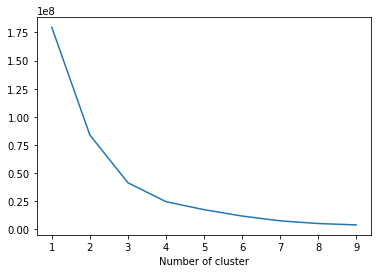

In [ ]:

sse={} # error
tx_recency = tx_user[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_  #cluster names corresponding to recency values 
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=4)
tx_user['FrequencyCluster']=kmeans.fit_predict(tx_user[['Frequency']])

#order the frequency cluster
tx_user = order_cluster('FrequencyCluster', 'Frequency', tx_user, True )
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3468.0,48.214533,43.356567,1.0,15.0,33.0,71.0,183.0
1,428.0,319.754673,130.117216,184.0,218.0,277.0,384.0,785.0
2,22.0,1271.090909,489.487284,828.0,951.0,1100.0,1423.5,2677.0
3,3.0,5733.333333,1718.216032,4413.0,4762.0,5111.0,6393.5,7676.0


In [ ]:
tx_uk['Revenue'] = tx_uk['UnitPrice'] * tx_uk['Quantity']
tx_revenue = tx_uk.groupby('CustomerID').Revenue.sum().reset_index()

In [ ]:
tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')


In [ ]:
tx_revenue.head()

,CustomerID,Revenue
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33053.19
3,12749.0,4090.88
4,12820.0,942.34


In [ ]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,17850.0,371,0,297,1,5391.21
1,15808.0,305,0,195,1,3651.27
2,14688.0,7,2,324,1,5579.10
3,16029.0,38,2,241,1,80850.84
4,13408.0,1,2,478,1,28117.04


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

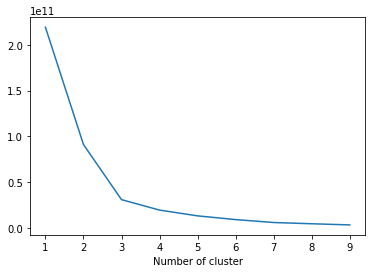

In [ ]:

sse={} # error
tx_recency = tx_user[['Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_  #cluster names corresponding to recency values 
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3)
tx_user['RevenueCluster'] = kmeans.fit_predict(tx_user[['Revenue']])

#order the cluster numbers
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

#show details of the dataframe
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3888.0,1352.299026,2083.663313,0.00,294.9625,637.775,1532.715,21086.30
1,30.0,46825.514667,17975.526858,25977.16,32138.5575,41287.900,58699.180,91062.38
2,3.0,207506.863333,46986.066791,168472.50,181431.6450,194390.790,227024.045,259657.30


In [ ]:
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']
tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Recency,Frequency,Revenue
OverallScore,,,
0,292.537906,22.498195,366.528863
1,155.138462,36.402797,853.384337
2,35.110154,59.834089,1229.563084
3,16.876847,315.992611,5039.343202
4,7.400000,822.433333,27676.685000
5,4.142857,1225.000000,106338.568571
6,1.333333,5733.333333,46245.940000


In [ ]:
tx_user['Segment'] = 'Bronze'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Silver' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'Gold' 

In [ ]:
tx_user.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,17850.0,371,0,297,1,5391.21,0,1,Bronze
1,15808.0,305,0,195,1,3651.27,0,1,Bronze
2,14688.0,7,2,324,1,5579.10,0,3,Silver
3,13767.0,1,2,368,1,17220.36,0,3,Silver
4,13448.0,16,2,194,1,3534.69,0,3,Silver


In [ ]:
from datetime import date, datetime,timedelta
tx_6m1 = tx_uk[(tx_uk.InvoiceDate < datetime(2011,6,1)) & (tx_uk.InvoiceDate >= datetime(2011,1,1))].reset_index(drop=True) #6 months time
tx_6m2 = tx_uk[(tx_uk.InvoiceDate >= datetime(2011,6,1)) & (tx_uk.InvoiceDate < datetime(2011,12,1))].reset_index(drop=True)

In [ ]:
tx_6m2['Revenue'] = tx_6m2['UnitPrice'] * tx_6m2['Quantity']
tx_user_6m = tx_6m2.groupby('CustomerID')['Revenue'].sum().reset_index()
tx_user_6m.columns = ['CustomerID','m6_Revenue']

In [ ]:
tx_user_6m.head()

,CustomerID,m6_Revenue
0,12747.0,1666.11
1,12748.0,22616.37
2,12749.0,2468.72
3,12820.0,561.53
4,12822.0,948.88


In [ ]:
tx_merge = pd.merge(tx_user, tx_user_6m, on='CustomerID', how='left')

In [ ]:
tx_merge = tx_merge[tx_merge['m6_Revenue']<tx_merge['m6_Revenue'].quantile(0.99)]

In [ ]:
kmeans = KMeans(n_clusters=3)
tx_merge['LTVCluster'] = kmeans.fit_predict(tx_merge[['m6_Revenue']])

In [ ]:
tx_merge.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue,LTVCluster
2,14688.0,7,2,324,1,5579.10,0,3,Silver,2163.40,2
3,13767.0,1,2,368,1,17220.36,0,3,Silver,9093.09,1
4,13448.0,16,2,194,1,3534.69,0,3,Silver,2111.43,2
5,15513.0,32,2,308,1,14758.22,0,3,Silver,8688.76,1
6,17920.0,3,2,665,1,4119.50,0,3,Silver,2115.79,2


In [ ]:
tx_merge = order_cluster('LTVCluster', 'm6_Revenue',tx_merge,True)

#creatinga new cluster dataframe
tx_cluster = tx_merge.copy()

#see details of the clusters
tx_cluster.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,2522.0,506.062947,355.158090,0.00,219.665,397.25,738.895,1434.37
1,519.0,2368.044624,818.740458,1445.00,1710.760,2074.16,2887.305,4575.92
2,69.0,6878.172319,1819.328956,4745.69,5517.630,6379.09,7508.750,11992.40


In [ ]:
tx_cluster.head()

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue,LTVCluster
0,14688.0,7,2,324,1,5579.10,0,3,Silver,2163.40,1
1,13448.0,16,2,194,1,3534.69,0,3,Silver,2111.43,1
2,17920.0,3,2,665,1,4119.50,0,3,Silver,2115.79,1
3,17377.0,23,2,404,1,4058.32,0,3,Silver,2460.70,1
4,17346.0,3,2,483,1,2622.88,0,3,Silver,1702.10,1


In [ ]:
tx_class = pd.get_dummies(tx_cluster)

In [ ]:
corr_matrix = tx_class.corr()
corr_matrix['LTVCluster'].sort_values(ascending=False)

LTVCluster            1.000000
m6_Revenue            0.867601
Revenue               0.808438
Frequency             0.527689
Segment_Silver        0.502959
                        ...   
CustomerID_13596.0   -0.008248
CustomerID_13332.0   -0.008248
CustomerID_14946.0   -0.008248
Recency              -0.274558
Segment_Bronze       -0.502959
Name: LTVCluster, Length: 3121, dtype: float64

In [ ]:
X = tx_class.drop(['LTVCluster','m6_Revenue'],axis=1)
y = tx_class['LTVCluster']

In [ ]:
#split training and test sets
from sklearn.model_selection import KFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

In [ ]:
import xgboost as xgb
ltv_xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1,n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(ltv_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(ltv_xgb_model.score(X_test[X_train.columns], y_test)))

y_pred = ltv_xgb_model.predict(X_test)

Accuracy of XGB classifier on training set: 0.97
Accuracy of XGB classifier on test set: 0.92


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(ltv_xgb_model,X,y,cv=10,scoring='accuracy').mean()

In [ ]:
cross_val

0.8807073954983922

In [ ]:
filename = 'SimpleXgboost'
pickle.dump(ltv_xgb_model, open(filename, 'wb'))

***Tuning XGB Model***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

from scipy.stats import randint

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
random_classifier = xgb.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(random_classifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [ ]:
from sklearn import preprocessing
z = preprocessing.label_binarize(y, classes=[0, 1, 2, 3])

In [ ]:
random_search.fit(X, y)
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  9.6min finished


{'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.4}


In [ ]:
random_search.best_score_

0.8765273311897108

In [ ]:
tuned_xgb = xgb.XGBClassifier(min_child_weight=5,max_depth=4,learning_rate=0.05,gamma=0.0,colsample_bytree=0.4)

In [ ]:
tuned_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = tuned_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)

In [ ]:
accuracy_score

0.9551282051282052

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(tuned_xgb,X,y,cv=10,scoring='accuracy').mean()

In [ ]:
cross_val

0.8893890675241156

In [ ]:
filename = 'TunedXgboost'
pickle.dump(tuned_xgb, open(filename, 'wb'))

***Using Random Forest Classifier***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, X, y)

In [ ]:
print(rf_parameters)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 200}


In [ ]:
clasifier=RandomForestClassifier(bootstrap= False, criterion= 'gini', max_depth= None, max_features= 1, min_samples_leaf= 1, n_estimators= 200)

clasifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = clasifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

accuracy_score=accuracy_score(y_test,y_pred)

In [ ]:
accuracy_score

0.9423076923076923

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(clasifier,X,y,cv=10,scoring='accuracy').mean()

In [ ]:
cross_val

0.8633440514469453

In [ ]:
import pickle

In [ ]:
filename = 'random_forest_retail.sav'
pickle.dump(clasifier, open(filename, 'wb'))

In [ ]:
!ls

Online_Retail.xlsx  random_forest_retail.sav  sample_data
